# Decision Tree & Random Forest: Company Sales Analysis

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Step 2: Load Dataset
np.random.seed(42)
df = pd.read_csv(r"C:\Users\ASUS\Downloads\Company_Data.csv")

In [3]:
# Step 3: Preprocessing
df['HighSales'] = df['Sales'].apply(lambda x: 'Yes' if x > 10 else 'No')
df.drop('Sales', axis=1, inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['ShelveLoc'] = le.fit_transform(df['ShelveLoc'])
df['Urban'] = le.fit_transform(df['Urban'])
df['US'] = le.fit_transform(df['US'])
df['HighSales'] = le.fit_transform(df['HighSales'])

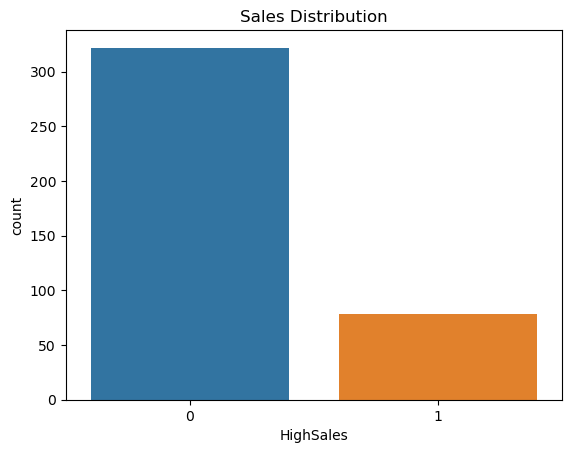

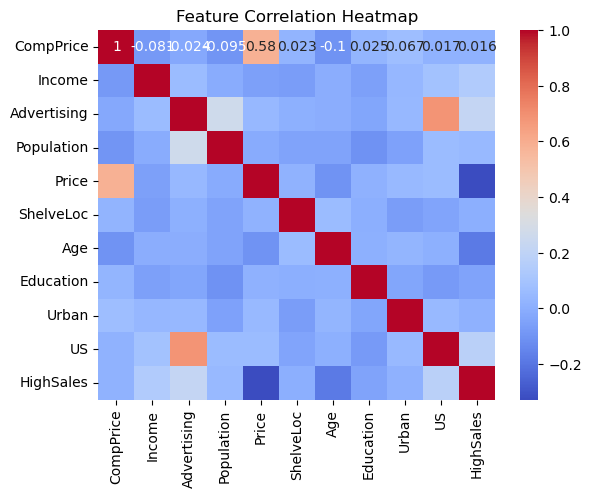

In [4]:
# Step 4: EDA
sns.countplot(x='HighSales', data=df)
plt.title("Sales Distribution")
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [5]:
# Step 5: Train-Test Split
X = df.drop('HighSales', axis=1)
y = df['HighSales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Step 6: Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7833333333333333
[[75 21]
 [ 5 19]]
              precision    recall  f1-score   support

           0       0.94      0.78      0.85        96
           1       0.47      0.79      0.59        24

    accuracy                           0.78       120
   macro avg       0.71      0.79      0.72       120
weighted avg       0.85      0.78      0.80       120



In [7]:
# Step 7: Hyperparameter Tuning
params = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5)
grid_dt.fit(X_train, y_train)
print("Best Parameters for Decision Tree:", grid_dt.best_params_)
best_dt = grid_dt.best_estimator_
print("Tuned Decision Tree Accuracy:", accuracy_score(y_test, best_dt.predict(X_test)))

Best Parameters for Decision Tree: {'max_depth': 3, 'min_samples_split': 10}
Tuned Decision Tree Accuracy: 0.7916666666666666


In [8]:
# Step 8: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.85


In [9]:
# Step 9: Bagging
bag = BaggingClassifier(n_estimators=100, random_state=42)
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))

Bagging Accuracy: 0.8666666666666667


In [10]:
# Step 10: Boosting
boost = GradientBoostingClassifier(n_estimators=100, random_state=42)
boost.fit(X_train, y_train)
y_pred_boost = boost.predict(X_test)
print("Boosting Accuracy:", accuracy_score(y_test, y_pred_boost))

Boosting Accuracy: 0.9083333333333333


C:\ProgramData\anaconda3\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


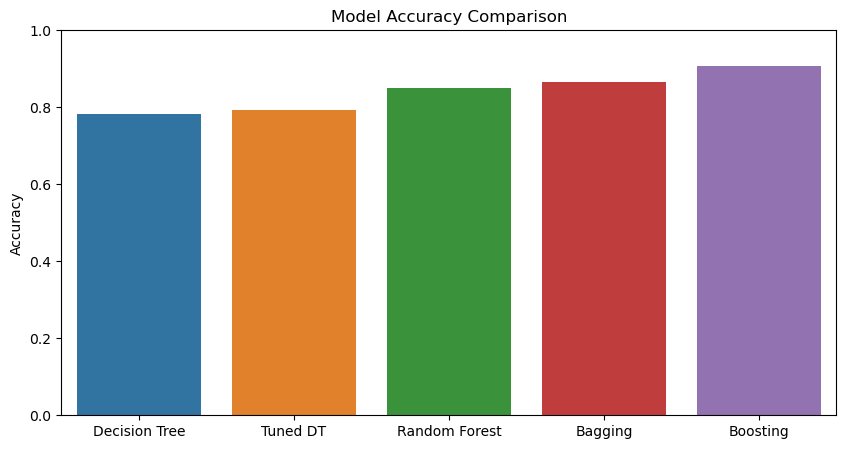

In [11]:
# Step 11: Accuracy Comparison
models = ['Decision Tree', 'Tuned DT', 'Random Forest', 'Bagging', 'Boosting']
accuracies = [
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, best_dt.predict(X_test)),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_bag),
    accuracy_score(y_test, y_pred_boost)
]

plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=accuracies)
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.show()